In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from datetime import datetime
from matplotlib.ticker import FuncFormatter

police_data_csv = "../Resources/Police_Department_Incidents.csv"

police_data = pd.read_csv(police_data_csv)
police_data.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [2]:
police_data["Month"] = pd.DatetimeIndex(police_data['Date']).month
police_data["Hour"] = pd.to_datetime(police_data['Time'], format='%H:%M').dt.hour
police_data["Day"] = pd.DatetimeIndex(police_data['Date']).day

In [3]:
police_data.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Month,Hour,Day
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120,1,11,29
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168,1,11,29
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010,4,14,25
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000,1,23,5
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000,1,0,1


In [4]:
police_data['Category'].unique()

array(['WEAPON LAWS', 'WARRANTS', 'NON-CRIMINAL', 'ASSAULT',
       'OTHER OFFENSES', 'MISSING PERSON', 'LARCENY/THEFT', 'BURGLARY',
       'STOLEN PROPERTY', 'ROBBERY', 'FRAUD', 'DRUG/NARCOTIC',
       'VEHICLE THEFT', 'RECOVERED VEHICLE', 'VANDALISM', 'ARSON',
       'PROSTITUTION', 'SECONDARY CODES', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'TRESPASS', 'SEX OFFENSES, NON FORCIBLE', 'SEX OFFENSES, FORCIBLE',
       'RUNAWAY', 'KIDNAPPING', 'DISORDERLY CONDUCT',
       'DRIVING UNDER THE INFLUENCE', 'FORGERY/COUNTERFEITING',
       'EMBEZZLEMENT', 'BRIBERY', 'FAMILY OFFENSES', 'GAMBLING',
       'SUICIDE', 'LIQUOR LAWS', 'EXTORTION', 'LOITERING', 'TREA',
       'BAD CHECKS', 'PORNOGRAPHY/OBSCENE MAT'], dtype=object)

In [5]:
drinking = ['DRUNKENNESS','DRIVING UNDER THE INFLUENCE']
drunk_data = police_data.loc[police_data['Category'].isin(drinking)]
sort_drunk_data = drunk_data.sort_values("Hour")
sort_drunk_data.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Month,Hour,Day
110377,161052065,DRUNKENNESS,UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE,Wednesday,12/28/2016 12:00:00 AM,00:17,SOUTHERN,NONE,MISSION ST / GRACE ST,-122.415487,37.775606,"(37.7756059226244, -122.415487220744)",16105206519090,12,0,28
24174,160070004,DRIVING UNDER THE INFLUENCE,DRIVING WHILE UNDER THE INFLUENCE OF ALCOHOL,Monday,01/25/2016 12:00:00 AM,00:12,TENDERLOIN,"ARREST, BOOKED",TURK ST / LEAVENWORTH ST,-122.414056,37.782793,"(37.7827931071006, -122.414056291891)",16007000465050,1,0,25
107019,150796511,DRIVING UNDER THE INFLUENCE,DRIVING WHILE UNDER THE INFLUENCE OF DRUGS,Sunday,09/11/2016 12:00:00 AM,00:33,SOUTHERN,EXCEPTIONAL CLEARANCE,TOWNSEND ST / 5TH ST,-122.397208,37.775333,"(37.7753329097568, -122.397207764774)",15079651165060,9,0,11
107057,160000283,DRIVING UNDER THE INFLUENCE,DRIVING WHILE UNDER THE INFLUENCE OF DRUGS,Friday,01/01/2016 12:00:00 AM,00:07,NORTHERN,"ARREST, BOOKED",POLK ST / CEDAR ST,-122.419835,37.786358,"(37.7863580362743, -122.419834938618)",16000028365060,1,0,1
75938,160751298,DRUNKENNESS,UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE,Friday,09/16/2016 12:00:00 AM,00:05,CENTRAL,"ARREST, BOOKED",GREEN ST / COLUMBUS AV,-122.409017,37.799488,"(37.7994880717633, -122.409017007613)",16075129819090,9,0,16


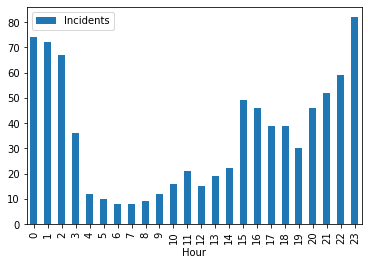

In [6]:
grouped_hours = sort_drunk_data.groupby("Hour")

summary_df = pd.DataFrame({
    "Incidents" : grouped_hours['IncidntNum'].count()
})

summary_df.plot(kind="bar");
plt.savefig("DrunkIncidents_byHour.png")
plt.show()

In [7]:
arrests = police_data.loc[police_data['Resolution'].isin(["ARREST, BOOKED","ARREST, CITED"])]

In [8]:
percentage_arrests_mean = arrests['IncidntNum'].count() / police_data['IncidntNum'].count()
percentage_arrests_mean

0.26285714285714284

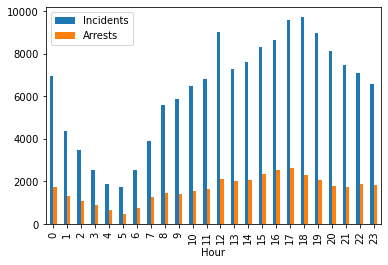

In [9]:
hour_groups = police_data.groupby("Hour")
arrest_groups = arrests.groupby('Hour')
percentage_arrests = arrest_groups['IncidntNum'].count() / hour_groups['IncidntNum'].count()

hourly_summary = pd.DataFrame({
    "Incidents" : hour_groups['IncidntNum'].count(),
    "Arrests" : arrest_groups['IncidntNum'].count(),
})

hourly_summary.plot(kind="bar");

(0.0, 0.5)

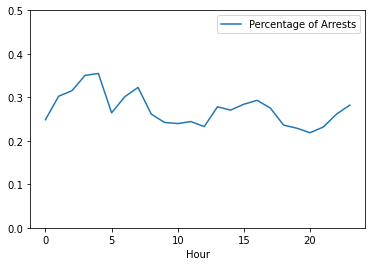

In [10]:
percentage_summary = pd.DataFrame({
    "Percentage of Arrests" : percentage_arrests,
})

percentage_summary.plot(kind="line")
plt.ylim((0, .5)) 

# plt.savefig("perc_arrests_byhour.png")
# plt.show()

In [11]:
narcotics = police_data.loc[police_data['Category'].isin(["DRUG/NARCOTIC"])]

In [12]:
narc_arrests = narcotics.loc[narcotics['Resolution'].isin(["ARREST, BOOKED","ARREST, CITED"])]

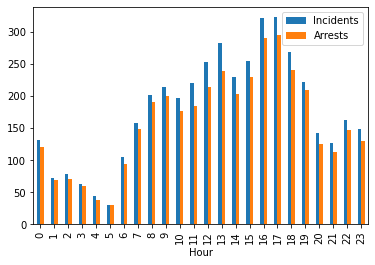

In [13]:
narcotic_incidents = narcotics.groupby('Hour')
narcotic_arrests = narc_arrests.groupby('Hour')
narc_percentage_arrests =  narcotic_arrests['IncidntNum'].count() / narcotic_incidents['IncidntNum'].count()

hourly_summary = pd.DataFrame({
    "Incidents" : narcotic_incidents['IncidntNum'].count(),
    "Arrests" : narcotic_arrests['IncidntNum'].count(),
})

hourly_summary.plot(kind="bar");

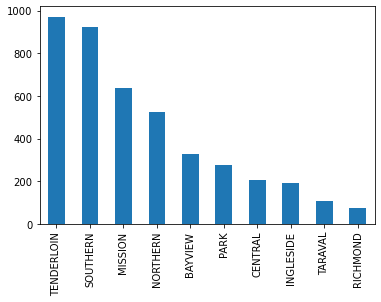

In [14]:
#drug arrests per district
narc_districts = narcotics["PdDistrict"].value_counts()
narc_districts.plot(kind="bar");

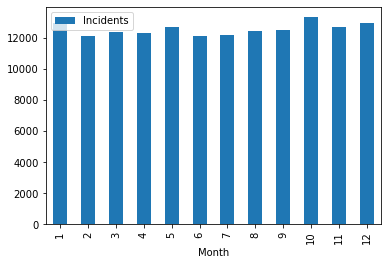

In [15]:
grouped_months = police_data.groupby("Month")
summary_df = pd.DataFrame({
    "Incidents" : grouped_months['IncidntNum'].count()
})
summary_df.plot(kind="bar");

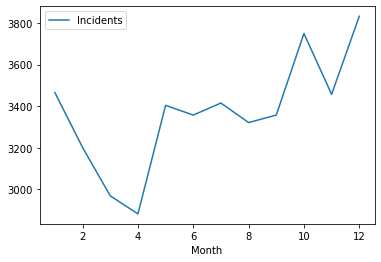

In [16]:
larceny_data = police_data.loc[police_data['Category'].isin(['LARCENY/THEFT'])]
larceny_months = larceny_data.groupby('Month')
larceny_summary_df = pd.DataFrame({
    "Incidents" : larceny_months['IncidntNum'].count()
})
larceny_summary_df.plot(kind="line");

In [17]:
assaults = police_data.loc[police_data['Category'].isin(["ASSAULT"])]
assault_arrests = assaults.loc[assaults['Resolution'].isin(["ARREST, BOOKED","ARREST, CITED"])]
assault_incidents = assaults.groupby('Hour')
assault_arrests_grp = assault_arrests.groupby('Hour')
assault_percentage_arrests =  assault_arrests_grp['IncidntNum'].count() / assault_incidents['IncidntNum'].count()

In [18]:
theft = police_data.loc[police_data['Category'].isin(["LARCENY/THEFT"])]
theft_arrests = theft.loc[theft['Resolution'].isin(["ARREST, BOOKED","ARREST, CITED"])]
theft_incidents = theft.groupby('Hour')
theft_arrests_grp = theft_arrests.groupby('Hour')
theft_percentage_arrests =  theft_arrests_grp['IncidntNum'].count() / theft_incidents['IncidntNum'].count()

In [19]:
vandalism = police_data.loc[police_data['Category'].isin(["VANDALISM"])]
vandalism_arrests = vandalism.loc[vandalism['Resolution'].isin(["ARREST, BOOKED","ARREST, CITED"])]
vandalism_incidents = vandalism.groupby('Hour')
vandalism_arrests_grp = vandalism_arrests.groupby('Hour')
vandalism_percentage_arrests =  vandalism_arrests_grp['IncidntNum'].count() / vandalism_incidents['IncidntNum'].count()

In [20]:
timeofday = ["12am",'1am','2am','3am']

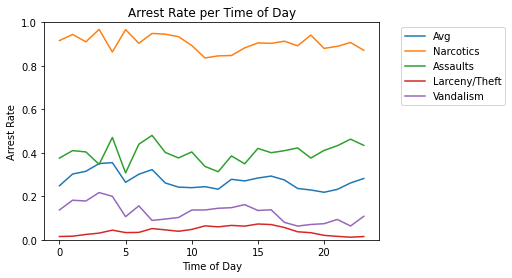

In [21]:
percentage_summary = pd.DataFrame({
    "Avg" : percentage_arrests,
    "Narcotics" : narc_percentage_arrests,
    "Assaults" : assault_percentage_arrests,
    "Larceny/Theft" : theft_percentage_arrests,
    "Vandalism" : vandalism_percentage_arrests
})

sum_chart = percentage_summary.plot(kind="line")
plt.ylim((0, 1)) 
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title("Arrest Rate per Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Arrest Rate")

plt.savefig("perc_arrests_byhour.png", bbox_inches='tight')
plt.show()


In [22]:
#top 15 crimes and arrest rates
police_data["Category"].value_counts()

LARCENY/THEFT                  40409
OTHER OFFENSES                 19599
NON-CRIMINAL                   17866
ASSAULT                        13577
VANDALISM                       8589
VEHICLE THEFT                   6419
WARRANTS                        5914
BURGLARY                        5802
SUSPICIOUS OCC                  5782
MISSING PERSON                  4338
DRUG/NARCOTIC                   4243
ROBBERY                         3299
FRAUD                           2635
SECONDARY CODES                 1841
TRESPASS                        1812
WEAPON LAWS                     1658
SEX OFFENSES, FORCIBLE           940
STOLEN PROPERTY                  882
RECOVERED VEHICLE                736
DISORDERLY CONDUCT               658
PROSTITUTION                     641
FORGERY/COUNTERFEITING           619
DRUNKENNESS                      465
DRIVING UNDER THE INFLUENCE      378
ARSON                            286
KIDNAPPING                       257
EMBEZZLEMENT                     168
L

In [23]:
top15crimes = ['LARCENY/THEFT',"OTHER OFFENSES","NON-CRIMINAL","ASSAULT","VANDALISM",
"VEHICLE THEFT","WARRANTS","BURGLARY","MISSING PERSON","DRUG/NARCOTIC"]

In [24]:
top15 = police_data.loc[police_data['Category'].isin(top15crimes)]

In [25]:
top15arrests = top15.loc[top15['Resolution'].isin(["ARREST, BOOKED","ARREST, CITED"])]

In [26]:
top15_group = top15.groupby("Category")
top15_arrest_group = top15arrests.groupby("Category")

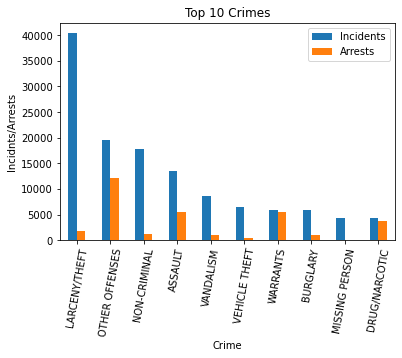

In [41]:
top15_df = pd.DataFrame({
    "Incidents" : top15_group['IncidntNum'].count(),
    "Arrests" : top15_arrest_group['IncidntNum'].count()
})
sort_df = top15_df.sort_values('Incidents', ascending=False)
chart = sort_df.plot(kind="bar");
plt.xlabel("Crime")
plt.ylabel("Incidnts/Arrests")
plt.title("Top 10 Crimes")
plt.xticks(rotation=80);

plt.savefig("top10.png", bbox_inches='tight')
plt.show()

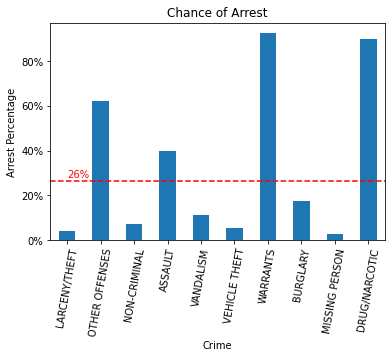

In [42]:
top15per_df = pd.DataFrame({
    "Incidents" : top15_group['IncidntNum'].count(),
    "Arrests" : top15_arrest_group['IncidntNum'].count(),
    "Percentage Arrests" : top15_arrest_group['IncidntNum'].count() /  top15_group['IncidntNum'].count()
})
sortper_df = top15per_df.sort_values('Incidents', ascending=False)
chart = sortper_df["Percentage Arrests"].plot(kind="bar");
plt.xticks(rotation=80)
plt.hlines(percentage_arrests_mean, -100, 100, linestyles='dashed', colors="red");
plt.xlabel("Crime")
plt.ylabel("Arrest Percentage")
plt.title("Chance of Arrest")
chart.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
format_mean = "{:.0%}".format(percentage_arrests_mean)
plt.annotate(format_mean,(0,.28),fontsize=10,color="red")

plt.savefig("arrestchance.png", bbox_inches='tight')
plt.show()

In [ ]:
top15per_df